In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv('crime_rate_Spain.csv')
pd.set_option('display.max_columns',30)

In [4]:
df.shape

(672, 4)

In [5]:
df.columns

Index(['Location', 'Year', 'Crime', 'Total cases'], dtype='object')

In [6]:
df.columns

Index(['Location', 'Year', 'Crime', 'Total cases'], dtype='object')

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

Location       0
Year           0
Crime          0
Total cases    0
dtype: int64

In [9]:
df = df[df['Location'] != 'Spain']

In [10]:
df

,Location,Year,Crime,Total cases
0,Barcelona,2021,Intentional homicides and consummated murders,36
1,Barcelona,2021,Intentional homicides and attempted murders,137
2,Barcelona,2021,Serious and less serious crimes of injuries an...,2161
3,Barcelona,2021,Kidnapping,8
4,Barcelona,2021,Crimes against freedom and sexual indemnity,2406
...,...,...,...,...
667,Melilla,2021,Robberies with force in homes,55
668,Melilla,2021,Theft,576
669,Melilla,2021,Vehicle theft,35
670,Melilla,2021,Drug trafficking,230


In [11]:
df['Location'].unique()

array(['Barcelona', 'Madrid', 'Valencia', 'Murcia', 'Seville', 'Zaragoza',
       'Malaga', 'Alicante', 'Cordoba', 'Granada', 'Rioja', 'Salamanca',
       'Segovia', 'Ceuta', 'Melilla'], dtype=object)

In [12]:
df['Crime'].unique()

array(['Intentional homicides and consummated murders',
       'Intentional homicides and attempted murders',
       'Serious and less serious crimes of injuries and riotous brawl',
       'Kidnapping', 'Crimes against freedom and sexual indemnity',
       'Sexual assault with penetration',
       'Other crimes against freedom and sexual indemnity',
       'Robbery with violence and intimidation',
       'Burglaries with force in homes', 'Robberies with force in homes',
       'Theft', 'Vehicle theft', 'Drug trafficking',
       'Other criminal offenses'], dtype=object)

In [13]:
df.duplicated().sum()

0

In [14]:
df

,Location,Year,Crime,Total cases
0,Barcelona,2021,Intentional homicides and consummated murders,36
1,Barcelona,2021,Intentional homicides and attempted murders,137
2,Barcelona,2021,Serious and less serious crimes of injuries an...,2161
3,Barcelona,2021,Kidnapping,8
4,Barcelona,2021,Crimes against freedom and sexual indemnity,2406
...,...,...,...,...
667,Melilla,2021,Robberies with force in homes,55
668,Melilla,2021,Theft,576
669,Melilla,2021,Vehicle theft,35
670,Melilla,2021,Drug trafficking,230


In [15]:
pivot1 = df.pivot_table(index="Year",values='Total cases',aggfunc=sum)

In [16]:
pivot1

,Total cases
Year,
2019,1426209
2020,1084853
2021,1261319


In [17]:
pivot1.columns

Index(['Total cases'], dtype='object')

In [18]:
pivot1.reset_index(inplace=True)

In [19]:
pivot1

,Year,Total cases
0,2019,1426209
1,2020,1084853
2,2021,1261319


In [20]:
pivot1mean = pivot1['Total cases'].mean()

In [21]:
pivot1mean

1257460.3333333333

In [22]:
pivot1.loc[pivot1['Total cases'] > pivot1mean, "IsGreaterThanMean"] = "Yes"
pivot1.loc[pivot1['Total cases'] < pivot1mean, "IsGreaterThanMean"] = "No"

In [23]:
pivot1

,Year,Total cases,IsGreaterThanMean
0,2019,1426209,Yes
1,2020,1084853,No
2,2021,1261319,Yes


In [24]:
pivot1.columns

Index(['Year', 'Total cases', 'IsGreaterThanMean'], dtype='object')

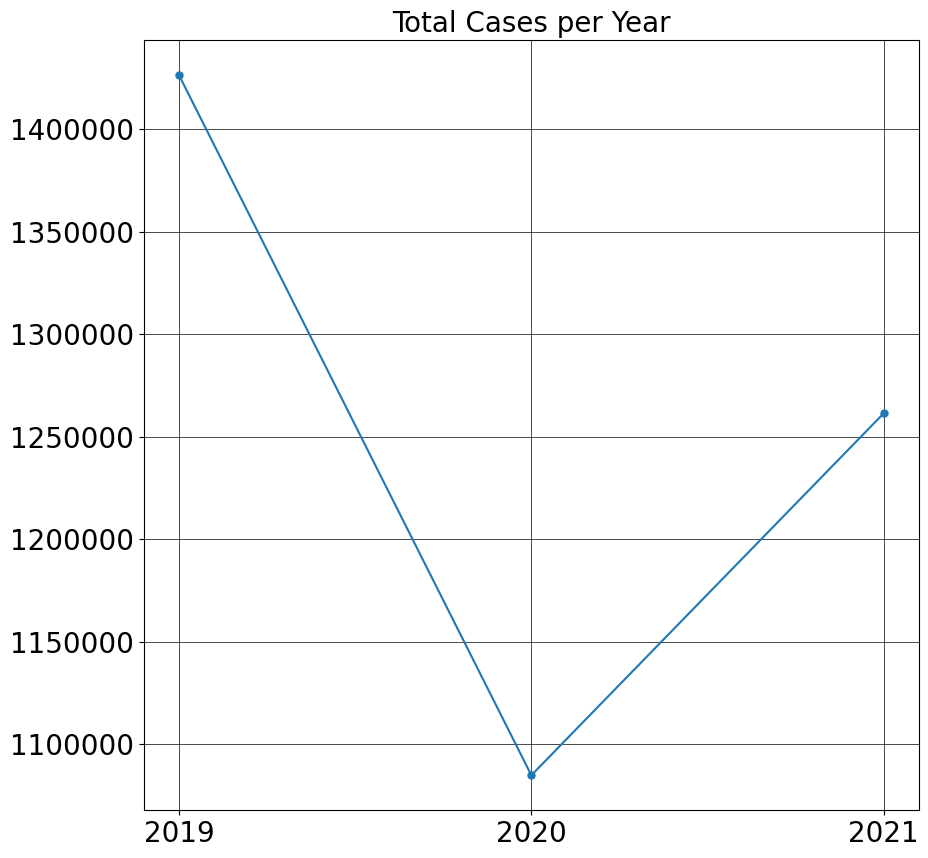

In [25]:

plt.figure(figsize =(10,10))
plt.ticklabel_format(style='plain')
plt.plot(pivot1['Year'],pivot1['Total cases'],marker='.',markersize = 10)
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.xticks(pivot1['Year'],fontsize=20)
plt.yticks(fontsize=20)
plt.title("Total Cases per Year",fontsize=20)

plt.show()

In [26]:
pivot2 = df.pivot_table(index="Location",values="Total cases", aggfunc=sum)

In [27]:
pivot2.sort_values(by='Total cases', ascending=False,inplace=True)

In [28]:
pivot2.reset_index(inplace=True)

In [29]:
pivot2

,Location,Total cases
0,Madrid,1090124
1,Barcelona,985235
2,Valencia,362524
3,Alicante,254633
4,Seville,244128
5,Malaga,230746
6,Murcia,176423
7,Zaragoza,98449
8,Granada,97560
9,Segovia,76710


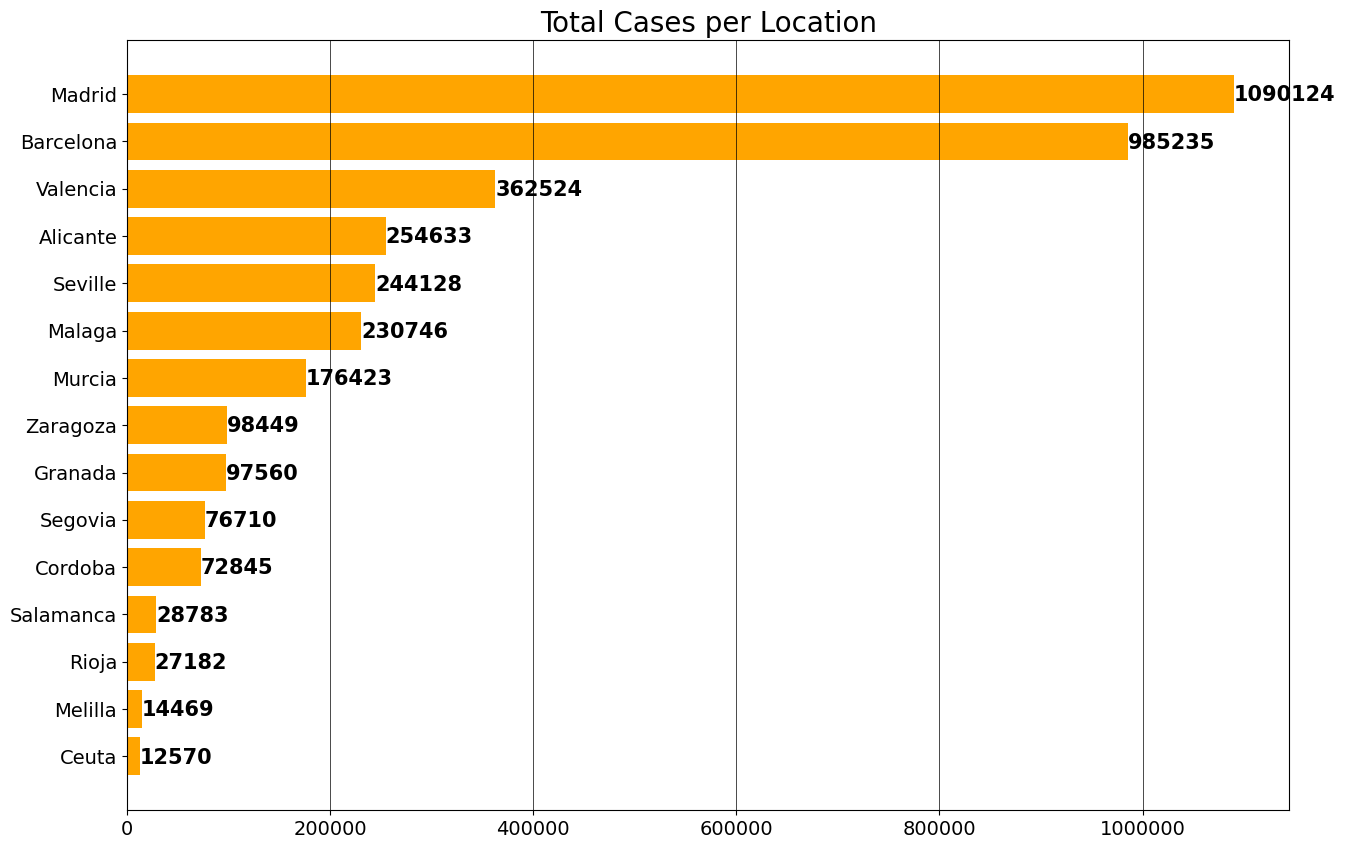

In [30]:
pivot2.sort_values(by='Total cases', ascending=True,inplace=True)
plt.figure(figsize =(15,10))
plt.ticklabel_format(style='plain')
y1 = pivot2['Location']
x1 = pivot2['Total cases']
plt.barh(y1,x1,color='orange')
plt.grid(True,color='black',axis='x',linestyle='-',linewidth=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(x1):
    plt.text(v + 1, i + -0.15, str(v), color='black', fontweight='bold',fontsize=15)
plt.title("Total Cases per Location",fontsize=20)
plt.show()

In [31]:
pivot2.sort_values(by='Total cases',ascending=False,inplace=True)

In [32]:
pivot2mean =pivot2['Total cases'].mean()

In [33]:
LocationMean = pivot2.assign(Mean = pivot2mean)

In [34]:
LocationMean = LocationMean.round(2)

In [35]:
LocationMean.loc[LocationMean['Total cases'] > LocationMean['Mean'], "IsGreaterThanMean"] = "Yes"
LocationMean.loc[LocationMean['Total cases'] < LocationMean['Mean'], "IsGreaterThanMean"] = "No"

In [36]:
LocationMean

,Location,Total cases,Mean,IsGreaterThanMean
0,Madrid,1090124,251492.07,Yes
1,Barcelona,985235,251492.07,Yes
2,Valencia,362524,251492.07,Yes
3,Alicante,254633,251492.07,Yes
4,Seville,244128,251492.07,No
5,Malaga,230746,251492.07,No
6,Murcia,176423,251492.07,No
7,Zaragoza,98449,251492.07,No
8,Granada,97560,251492.07,No
9,Segovia,76710,251492.07,No


In [37]:
pivot3 = df.pivot_table(index="Year",columns="Location",values="Total cases", aggfunc=sum)

In [38]:
pivot3

Location,Alicante,Barcelona,Ceuta,Cordoba,Granada,Madrid,Malaga,Melilla,Murcia,Rioja,Salamanca,Segovia,Seville,Valencia,Zaragoza
Year,,,,,,,,,,,,,,,
2019,96523,404552,4854,26617,35446,423399,84583,5716,63248,9341,10320,4700,91186,129715,36009
2020,72732,270214,3712,21938,28840,310194,66451,4545,50969,8268,8520,35489,72490,102117,28374
2021,85378,310469,4004,24290,33274,356531,79712,4208,62206,9573,9943,36521,80452,130692,34066


In [39]:
pivot3.columns

Index(['Alicante', 'Barcelona', 'Ceuta', 'Cordoba', 'Granada', 'Madrid',
       'Malaga', 'Melilla', 'Murcia', 'Rioja', 'Salamanca', 'Segovia',
       'Seville', 'Valencia', 'Zaragoza'],
      dtype='object', name='Location')

In [40]:
pivot3.reset_index(inplace=True)

In [41]:
pivot3 = pivot3.rename_axis(None, axis=1)

In [42]:
pivot3.columns

Index(['Year', 'Alicante', 'Barcelona', 'Ceuta', 'Cordoba', 'Granada',
       'Madrid', 'Malaga', 'Melilla', 'Murcia', 'Rioja', 'Salamanca',
       'Segovia', 'Seville', 'Valencia', 'Zaragoza'],
      dtype='object')

In [43]:
pivot3

,Year,Alicante,Barcelona,Ceuta,Cordoba,Granada,Madrid,Malaga,Melilla,Murcia,Rioja,Salamanca,Segovia,Seville,Valencia,Zaragoza
0,2019,96523,404552,4854,26617,35446,423399,84583,5716,63248,9341,10320,4700,91186,129715,36009
1,2020,72732,270214,3712,21938,28840,310194,66451,4545,50969,8268,8520,35489,72490,102117,28374
2,2021,85378,310469,4004,24290,33274,356531,79712,4208,62206,9573,9943,36521,80452,130692,34066


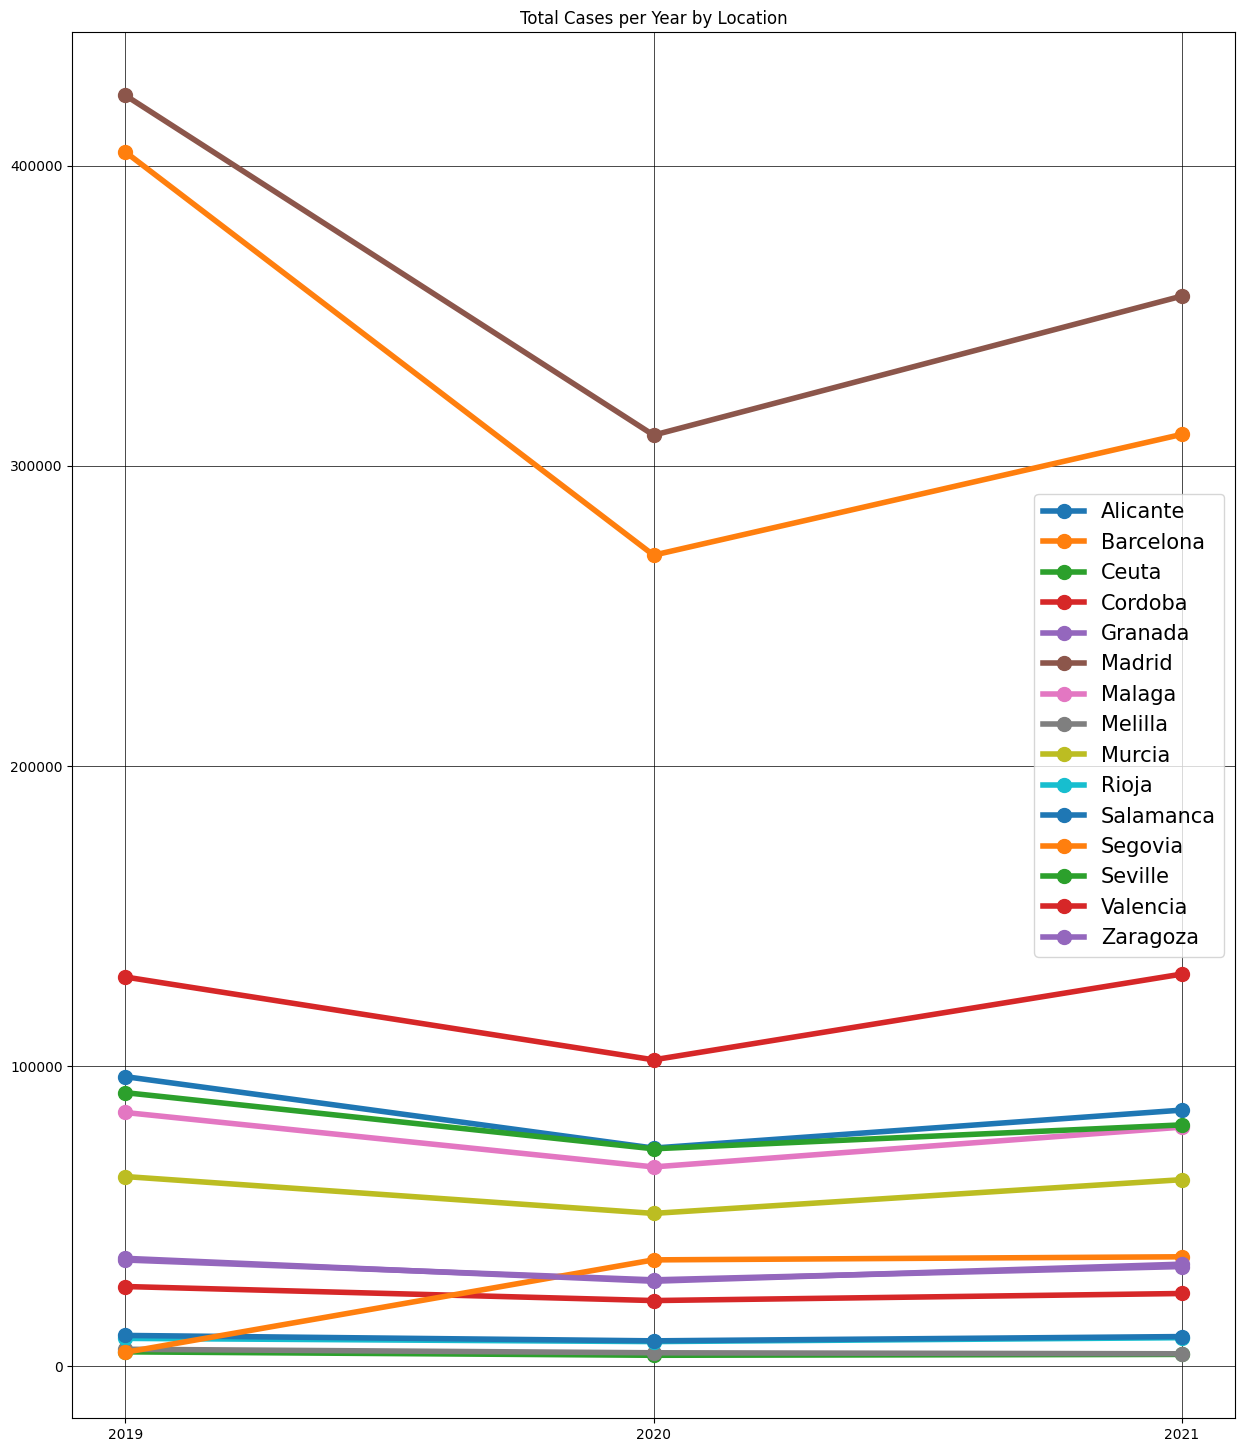

In [44]:
plt.figure(figsize =(15,18))
plt.title("Total Cases per Year by Location")
for i in pivot3.columns:
    if i != 'Year':
        plt.plot(pivot3['Year'],pivot3[i],label=i,marker='.',linewidth=4,markersize=20)
plt.xticks(pivot3['Year'])
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.legend(fontsize=15)
plt.show()

In [45]:
pivot4 = df.pivot_table(index="Location",columns="Year",values="Total cases", aggfunc=sum)

In [46]:
pivot4

Year,2019,2020,2021
Location,,,
Alicante,96523,72732,85378
Barcelona,404552,270214,310469
Ceuta,4854,3712,4004
Cordoba,26617,21938,24290
Granada,35446,28840,33274
Madrid,423399,310194,356531
Malaga,84583,66451,79712
Melilla,5716,4545,4208
Murcia,63248,50969,62206


In [47]:
pivot4= pivot4.rename_axis(None, axis=1)

In [48]:
pivot4.reset_index(inplace=True)

In [49]:
pivot4

,Location,2019,2020,2021
0,Alicante,96523,72732,85378
1,Barcelona,404552,270214,310469
2,Ceuta,4854,3712,4004
3,Cordoba,26617,21938,24290
4,Granada,35446,28840,33274
5,Madrid,423399,310194,356531
6,Malaga,84583,66451,79712
7,Melilla,5716,4545,4208
8,Murcia,63248,50969,62206
9,Rioja,9341,8268,9573


In [50]:
pivot4 = pivot4.assign(Mean=lambda x: ((x[2019]+x[2020]+x[2021])/3).round(2))

In [51]:
pivot4

,Location,2019,2020,2021,Mean
0,Alicante,96523,72732,85378,84877.67
1,Barcelona,404552,270214,310469,328411.67
2,Ceuta,4854,3712,4004,4190.00
3,Cordoba,26617,21938,24290,24281.67
4,Granada,35446,28840,33274,32520.00
5,Madrid,423399,310194,356531,363374.67
6,Malaga,84583,66451,79712,76915.33
7,Melilla,5716,4545,4208,4823.00
8,Murcia,63248,50969,62206,58807.67
9,Rioja,9341,8268,9573,9060.67


In [52]:
pivot5= df.pivot_table(index="Crime",values='Total cases',aggfunc=sum)

In [53]:
pivot5 = pivot5.sort_values(by="Total cases",ascending=False)

In [54]:
pivot5.reset_index(inplace=True)

In [55]:
pivot5

,Crime,Total cases
0,Other criminal offenses,2037560
1,Theft,1112345
2,Burglaries with force in homes,164453
3,Robberies with force in homes,146260
4,Robbery with violence and intimidation,131385
5,Vehicle theft,62947
6,Drug trafficking,31731
7,Serious and less serious crimes of injuries an...,30783
8,Crimes against freedom and sexual indemnity,26326
9,Other crimes against freedom and sexual indemnity,23037


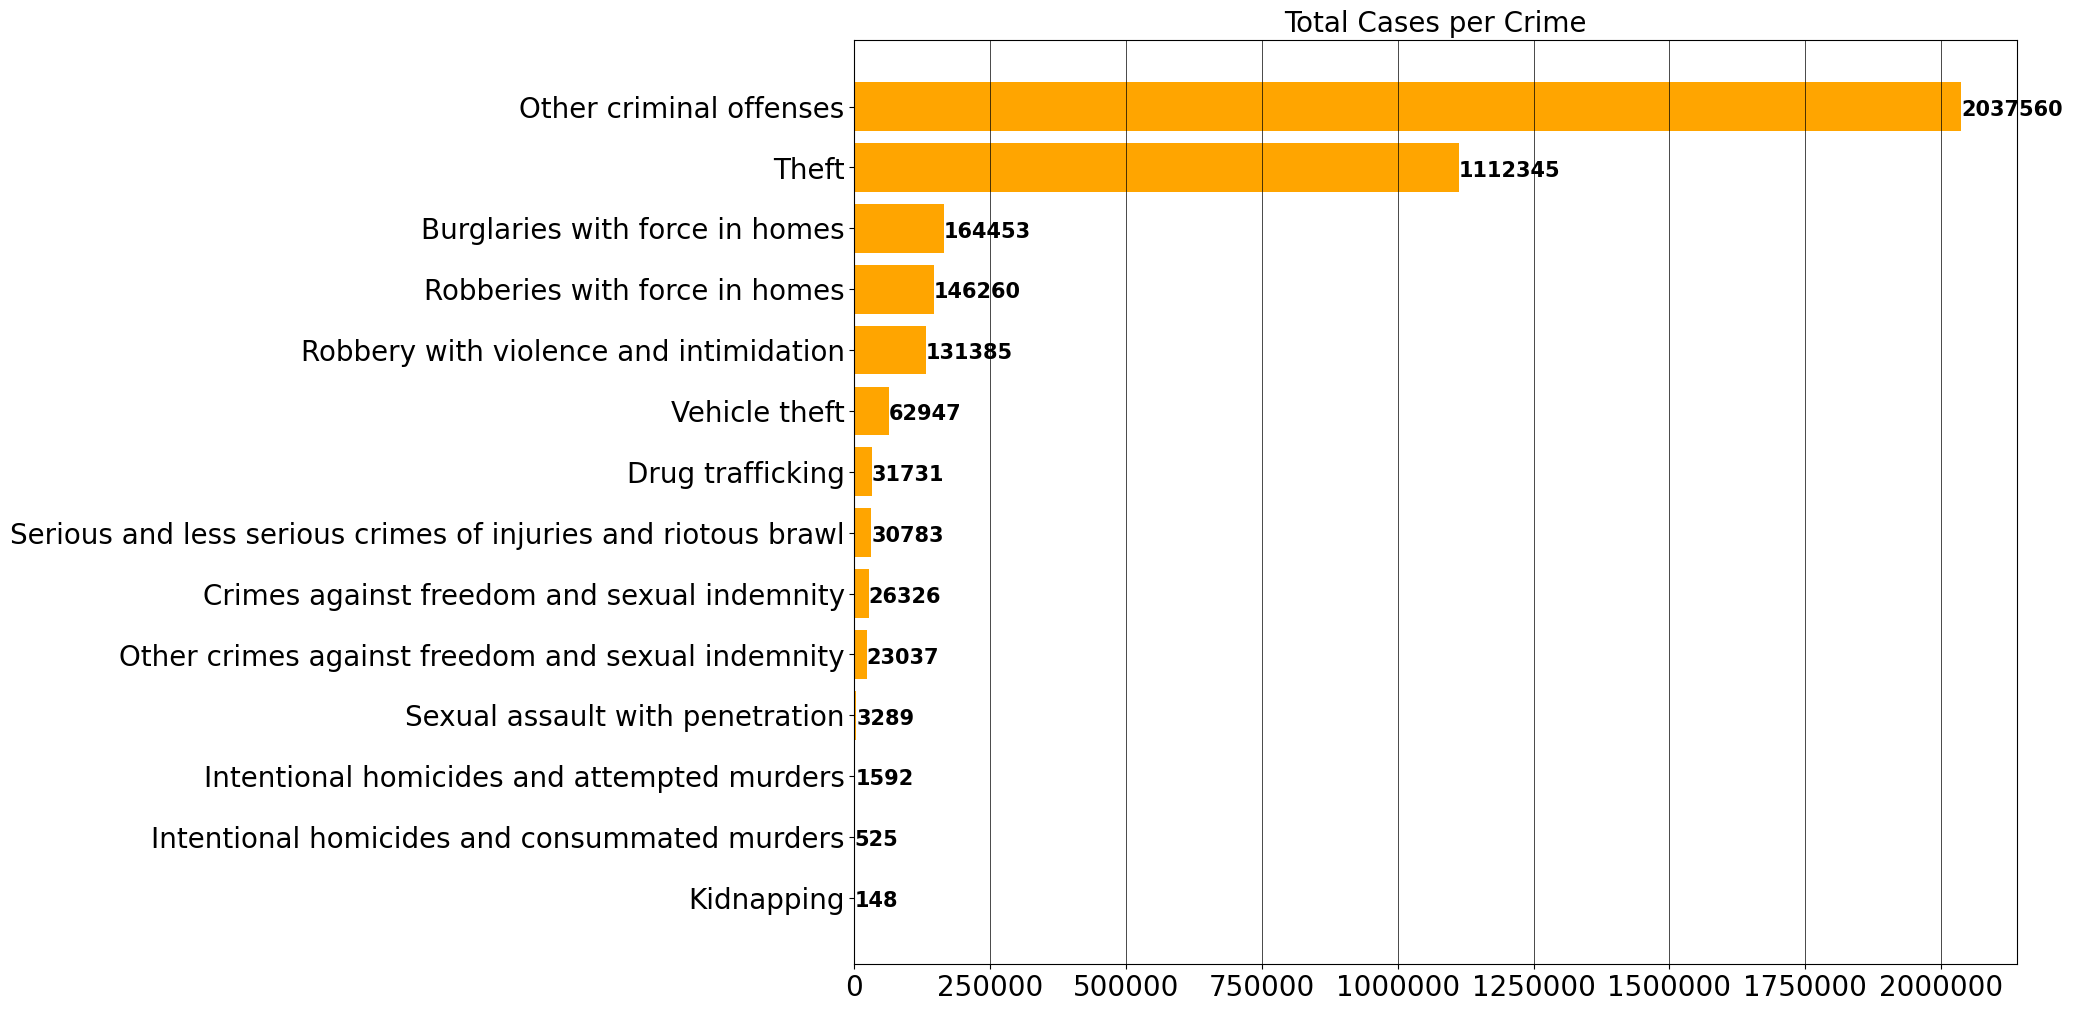

In [56]:
pivot5.sort_values(by='Total cases', ascending=True,inplace=True)
plt.figure(figsize =(15,12))
plt.ticklabel_format(style='plain')
y1 = pivot5['Crime']
x1 = pivot5['Total cases']
plt.barh(y1,x1,color='orange')
plt.grid(True,color='black',axis='x',linestyle='-',linewidth=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for i, v in enumerate(x1):
    plt.text(v + 1, i + -0.15, str(v), color='black', fontweight='bold',fontsize=15)
plt.title("Total Cases per Crime",fontsize=20)
plt.show()

In [57]:
pivot5.sort_values(by='Total cases',ascending=False,inplace=True)

In [58]:
pivot5mean = pivot5['Total cases'].mean()

In [59]:
pivot5 = pivot5.assign(Mean = pivot2mean)
pivot5 = pivot5.round(2)

In [60]:
pivot5.loc[pivot5['Total cases'] > pivot5['Mean'], "IsGreaterThanMean"] = "Yes"
pivot5.loc[pivot5['Total cases'] < pivot5['Mean'], "IsGreaterThanMean"] = "No"

In [61]:
pivot5

,Crime,Total cases,Mean,IsGreaterThanMean
0,Other criminal offenses,2037560,251492.07,Yes
1,Theft,1112345,251492.07,Yes
2,Burglaries with force in homes,164453,251492.07,No
3,Robberies with force in homes,146260,251492.07,No
4,Robbery with violence and intimidation,131385,251492.07,No
5,Vehicle theft,62947,251492.07,No
6,Drug trafficking,31731,251492.07,No
7,Serious and less serious crimes of injuries an...,30783,251492.07,No
8,Crimes against freedom and sexual indemnity,26326,251492.07,No
9,Other crimes against freedom and sexual indemnity,23037,251492.07,No


In [62]:
pivot6 = df.pivot_table(index="Crime", columns='Year',values='Total cases',aggfunc=sum)

In [63]:
pivot6

Year,2019,2020,2021
Crime,,,
Burglaries with force in homes,88049,13188,63216
Crimes against freedom and sexual indemnity,8622,7706,9998
Drug trafficking,9594,10450,11687
Intentional homicides and attempted murders,481,536,575
Intentional homicides and consummated murders,190,168,167
Kidnapping,51,43,54
Other crimes against freedom and sexual indemnity,7558,6735,8744
Other criminal offenses,683237,645367,708956
Robberies with force in homes,58824,42902,44534


In [64]:
pivot6= pivot6.rename_axis(None, axis=1)

In [65]:
pivot6.reset_index(inplace=True)

In [66]:
pivot6 = pivot6.assign(TotalSum = lambda x: x[2019]+x[2020]+x[2021])

In [67]:
pivot6 = pivot6.sort_values(by='TotalSum',ascending=False)

In [68]:
pivot6

,Crime,2019,2020,2021,TotalSum
7,Other criminal offenses,683237,645367,708956,2037560
12,Theft,479995,293085,339265,1112345
0,Burglaries with force in homes,88049,13188,63216,164453
8,Robberies with force in homes,58824,42902,44534,146260
9,Robbery with violence and intimidation,52711,36275,42399,131385
13,Vehicle theft,25445,18408,19094,62947
2,Drug trafficking,9594,10450,11687,31731
10,Serious and less serious crimes of injuries an...,10388,9019,11376,30783
1,Crimes against freedom and sexual indemnity,8622,7706,9998,26326
6,Other crimes against freedom and sexual indemnity,7558,6735,8744,23037


In [69]:
pivot7 = df.pivot_table(index="Year", columns='Crime',values='Total cases',aggfunc=sum)

In [70]:
pivot7 = pivot7.rename_axis(None,axis=1)

In [71]:
pivot7.reset_index(inplace=True)

In [72]:
pivot7

,Year,Burglaries with force in homes,Crimes against freedom and sexual indemnity,Drug trafficking,Intentional homicides and attempted murders,Intentional homicides and consummated murders,Kidnapping,Other crimes against freedom and sexual indemnity,Other criminal offenses,Robberies with force in homes,Robbery with violence and intimidation,Serious and less serious crimes of injuries and riotous brawl,Sexual assault with penetration,Theft,Vehicle theft
0,2019,88049,8622,9594,481,190,51,7558,683237,58824,52711,10388,1064,479995,25445
1,2020,13188,7706,10450,536,168,43,6735,645367,42902,36275,9019,971,293085,18408
2,2021,63216,9998,11687,575,167,54,8744,708956,44534,42399,11376,1254,339265,19094


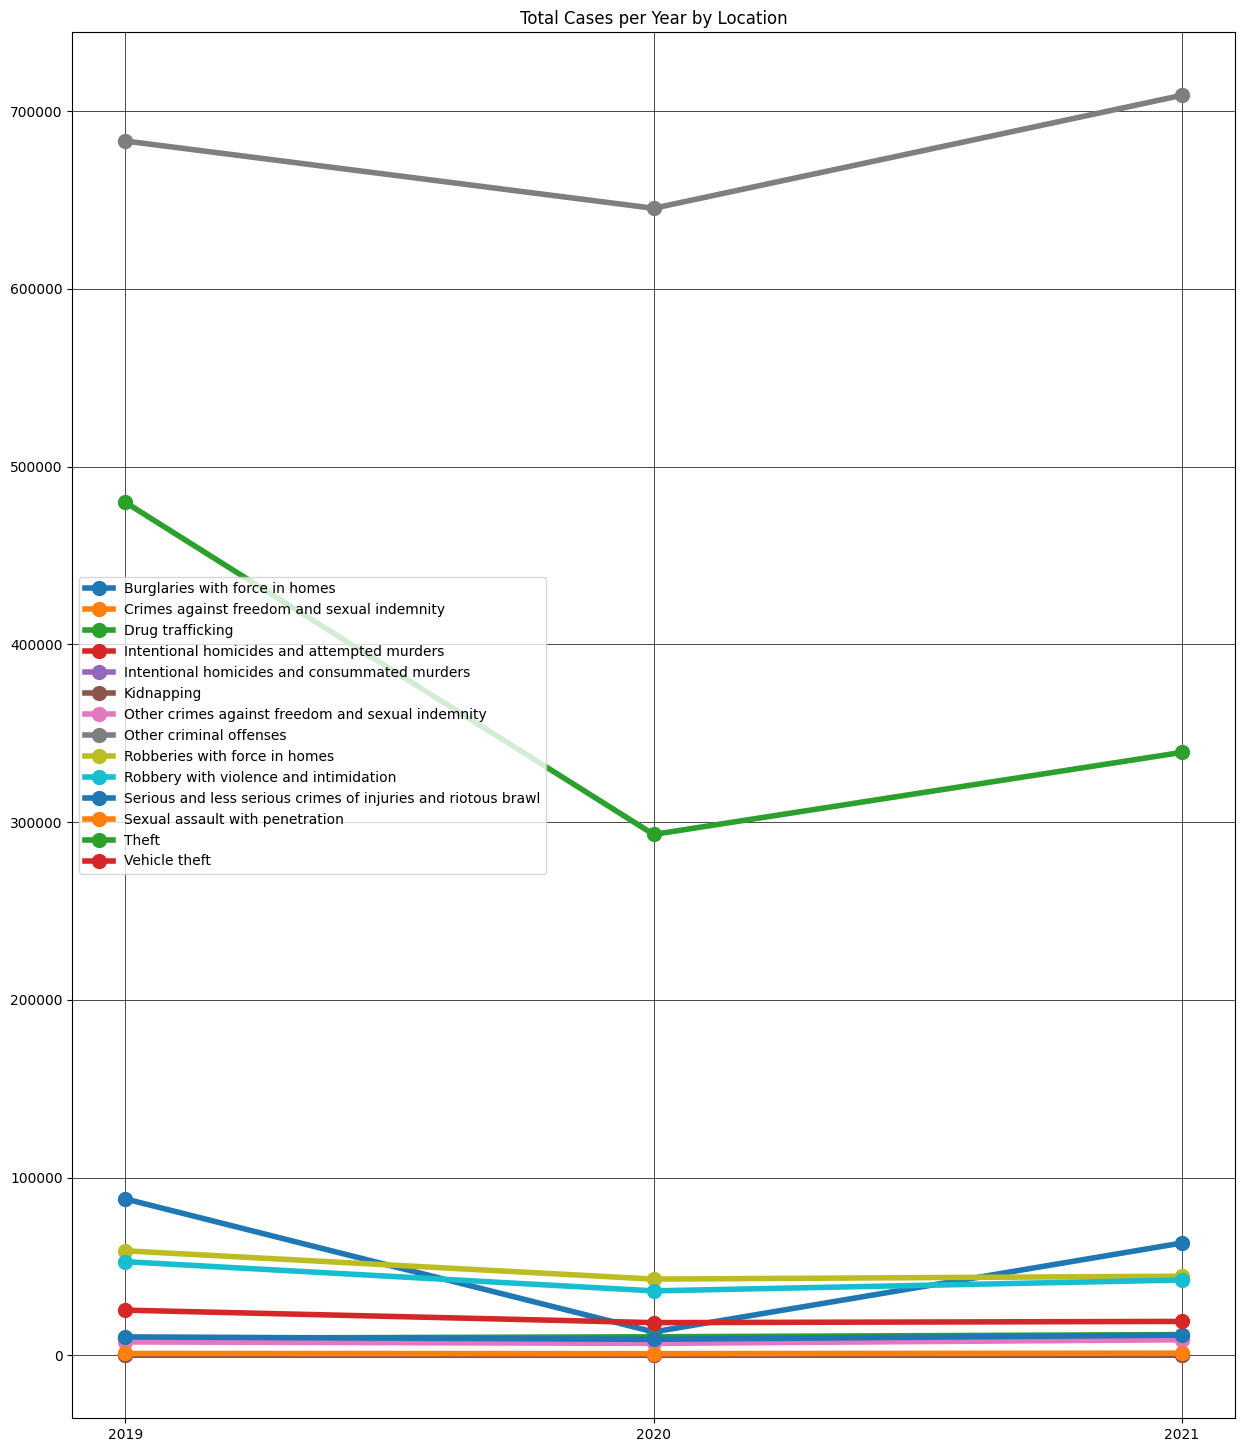

In [73]:
plt.figure(figsize =(15,18))
plt.title("Total Cases per Year by Location")
for i in pivot7.columns:
    if i != 'Year':
        plt.plot(pivot7['Year'],pivot7[i],label=i,marker='.',linewidth=4,markersize=20)
plt.xticks(pivot3['Year'])
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.legend(fontsize=10)
plt.show()

In [74]:
pivot8 = df.pivot_table(index="Location",columns='Crime',values="Total cases",aggfunc=sum)

In [75]:
pivot8 = pivot8.rename_axis(None,axis=1)

In [76]:
pivot8total_sum = pivot8.sum(axis=1)

In [77]:
pivot8.insert(value=pivot8total_sum,column='TotalSum',loc=14)

In [78]:
pivot8 = pivot8.sort_values(by='TotalSum', ascending=False)

In [79]:
pivot8.reset_index(inplace=True)

In [80]:
pivot8

,Location,Burglaries with force in homes,Crimes against freedom and sexual indemnity,Drug trafficking,Intentional homicides and attempted murders,Intentional homicides and consummated murders,Kidnapping,Other crimes against freedom and sexual indemnity,Other criminal offenses,Robberies with force in homes,Robbery with violence and intimidation,Serious and less serious crimes of injuries and riotous brawl,Sexual assault with penetration,Theft,Vehicle theft,TotalSum
0,Madrid,34813,6617,7399,270,107,39,5883,585199,26779,38427,7406,734,355208,21243,1090124
1,Barcelona,44790,6328,6639,387,117,13,5195,445306,37856,57445,6148,1133,355337,18541,985235
2,Valencia,17854,2770,2842,184,59,12,2472,208055,17791,8376,3264,298,94275,4272,362524
3,Alicante,16638,2088,2525,110,42,10,1823,142996,17654,4064,2284,265,60805,3329,254633
4,Seville,11927,1658,1708,161,29,18,1535,143530,9188,6202,1998,123,61358,4693,244128
5,Malaga,9949,1600,3128,113,48,29,1451,134691,9990,4112,2433,149,58491,4562,230746
6,Murcia,11879,1649,1251,112,37,7,1475,101586,12603,4110,2244,174,36999,2297,176423
7,Zaragoza,3968,793,834,41,10,3,703,62031,3236,2645,1129,90,22389,577,98449
8,Granada,4522,716,2443,67,30,3,616,62241,3905,2021,973,100,18899,1024,97560
9,Segovia,2274,754,497,33,15,2,670,50418,2664,1039,976,84,16375,909,76710


# Sexual assault with penetration (Rape Cases)

In [81]:
SAWP_Count = pivot8[['Location','Sexual assault with penetration']]

In [82]:
SAWP_Count

,Location,Sexual assault with penetration
0,Madrid,734
1,Barcelona,1133
2,Valencia,298
3,Alicante,265
4,Seville,123
5,Malaga,149
6,Murcia,174
7,Zaragoza,90
8,Granada,100
9,Segovia,84


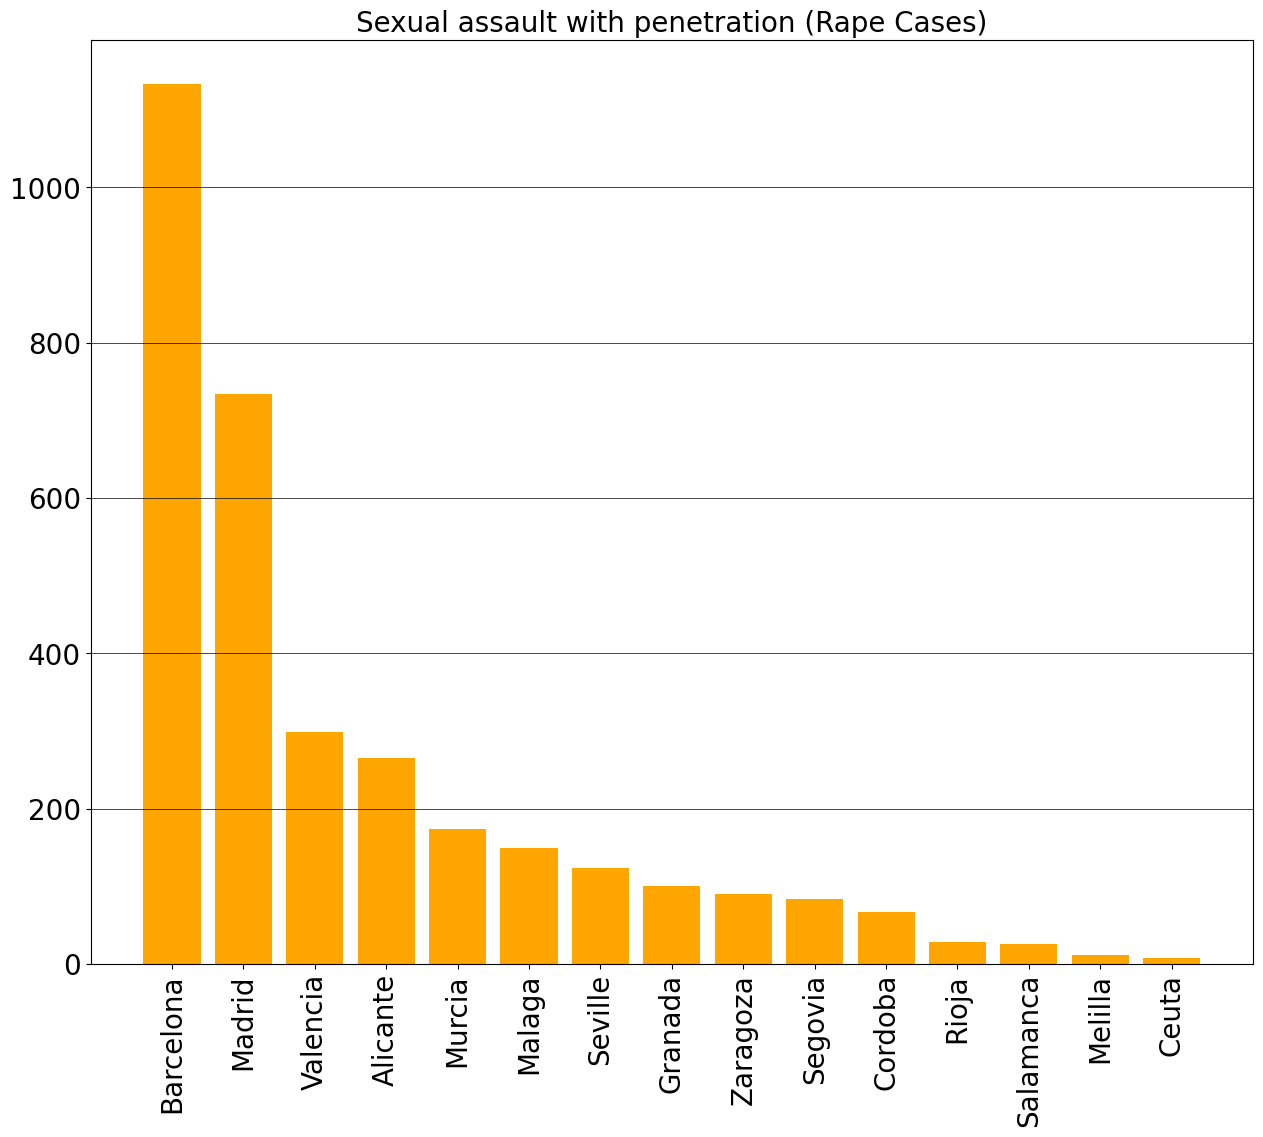

In [83]:
pivot8.sort_values(by='Sexual assault with penetration', ascending=False,inplace=True)
plt.figure(figsize =(15,12))
plt.ticklabel_format(style='plain')
y1 = pivot8['Location']
x1 = pivot8['Sexual assault with penetration']
plt.bar(y1,x1,color='orange')
plt.grid(True,color='black',axis='y',linestyle='-',linewidth=0.5)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title("Sexual assault with penetration (Rape Cases)",fontsize=20)

plt.show()

In [84]:
SAWP = df.pivot_table(index='Year',columns='Crime',values='Total cases',aggfunc=sum)

In [85]:
SAWP = SAWP.rename_axis(None,axis=1)

In [86]:
SAWP = SAWP.round(0)

In [87]:
SAWP.reset_index(inplace=True)

In [88]:
SAWP

,Year,Burglaries with force in homes,Crimes against freedom and sexual indemnity,Drug trafficking,Intentional homicides and attempted murders,Intentional homicides and consummated murders,Kidnapping,Other crimes against freedom and sexual indemnity,Other criminal offenses,Robberies with force in homes,Robbery with violence and intimidation,Serious and less serious crimes of injuries and riotous brawl,Sexual assault with penetration,Theft,Vehicle theft
0,2019,88049,8622,9594,481,190,51,7558,683237,58824,52711,10388,1064,479995,25445
1,2020,13188,7706,10450,536,168,43,6735,645367,42902,36275,9019,971,293085,18408
2,2021,63216,9998,11687,575,167,54,8744,708956,44534,42399,11376,1254,339265,19094


In [89]:
SAWP = SAWP[['Year','Sexual assault with penetration']]

In [90]:
SAWP

,Year,Sexual assault with penetration
0,2019,1064
1,2020,971
2,2021,1254


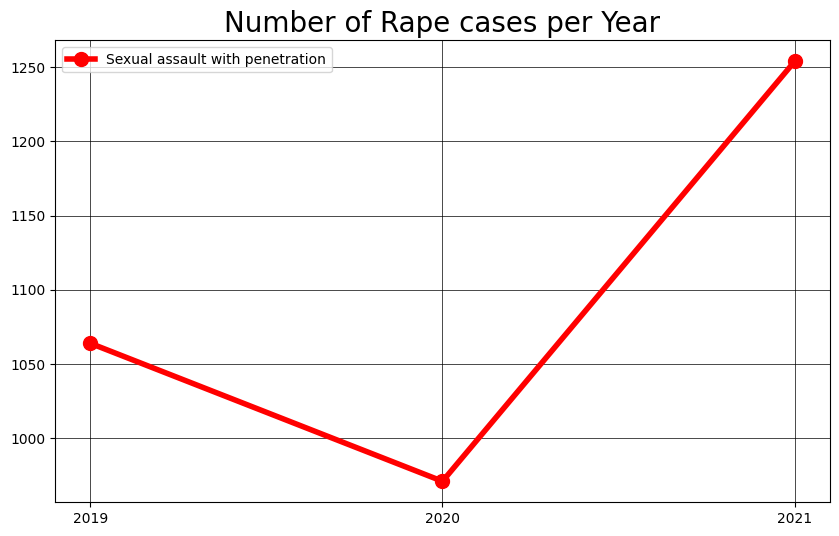

In [91]:
plt.figure(figsize =(10,6))
plt.title("Number of Rape cases per Year",fontsize =20)
for i in SAWP.columns:
    if i != 'Year':
        plt.plot(SAWP['Year'],SAWP[i],label=i,marker='.',linewidth=4,markersize=20,color='red')
plt.xticks(SAWP['Year'])
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.legend(fontsize=10)
plt.show()

In [92]:
pivot9 = df.pivot_table(index='Year',columns=['Crime','Location'],values='Total cases',aggfunc=sum)

In [93]:
pivot9.columns

MultiIndex([('Burglaries with force in homes',  'Alicante'),
            ('Burglaries with force in homes', 'Barcelona'),
            ('Burglaries with force in homes',     'Ceuta'),
            ('Burglaries with force in homes',   'Cordoba'),
            ('Burglaries with force in homes',   'Granada'),
            ('Burglaries with force in homes',    'Madrid'),
            ('Burglaries with force in homes',    'Malaga'),
            ('Burglaries with force in homes',   'Melilla'),
            ('Burglaries with force in homes',    'Murcia'),
            ('Burglaries with force in homes',     'Rioja'),
            ...
            (                 'Vehicle theft',    'Madrid'),
            (                 'Vehicle theft',    'Malaga'),
            (                 'Vehicle theft',   'Melilla'),
            (                 'Vehicle theft',    'Murcia'),
            (                 'Vehicle theft',     'Rioja'),
            (                 'Vehicle theft', 'Salamanca'),
        

In [94]:
SAWP2 = pivot9['Sexual assault with penetration']

In [95]:
SAWP2

Location,Alicante,Barcelona,Ceuta,Cordoba,Granada,Madrid,Malaga,Melilla,Murcia,Rioja,Salamanca,Segovia,Seville,Valencia,Zaragoza
Year,,,,,,,,,,,,,,,
2019,85,412,1,21,32,243,42,5,49,9,6,3,54,82,20
2020,81,285,2,22,25,217,58,4,64,10,9,42,31,92,29
2021,99,436,4,24,43,274,49,2,61,9,11,39,38,124,41


In [96]:
SAWP2.columns

Index(['Alicante', 'Barcelona', 'Ceuta', 'Cordoba', 'Granada', 'Madrid',
       'Malaga', 'Melilla', 'Murcia', 'Rioja', 'Salamanca', 'Segovia',
       'Seville', 'Valencia', 'Zaragoza'],
      dtype='object', name='Location')

In [97]:
SAWP2.reset_index(inplace=True)

In [98]:
SAWP2

Location,Year,Alicante,Barcelona,Ceuta,Cordoba,Granada,Madrid,Malaga,Melilla,Murcia,Rioja,Salamanca,Segovia,Seville,Valencia,Zaragoza
0,2019,85,412,1,21,32,243,42,5,49,9,6,3,54,82,20
1,2020,81,285,2,22,25,217,58,4,64,10,9,42,31,92,29
2,2021,99,436,4,24,43,274,49,2,61,9,11,39,38,124,41


In [99]:
SAWP2.columns

Index(['Year', 'Alicante', 'Barcelona', 'Ceuta', 'Cordoba', 'Granada',
       'Madrid', 'Malaga', 'Melilla', 'Murcia', 'Rioja', 'Salamanca',
       'Segovia', 'Seville', 'Valencia', 'Zaragoza'],
      dtype='object', name='Location')

In [100]:
#this code erase the named 'Location' at SAWP2 column area
SAWP2.columns = ['Year', 'Alicante', 'Barcelona', 'Ceuta', 'Cordoba', 'Granada',
       'Madrid', 'Malaga', 'Melilla', 'Murcia', 'Rioja', 'Salamanca','Segovia', 'Seville', 'Valencia', 'Zaragoza']

In [101]:
SAWP2

,Year,Alicante,Barcelona,Ceuta,Cordoba,Granada,Madrid,Malaga,Melilla,Murcia,Rioja,Salamanca,Segovia,Seville,Valencia,Zaragoza
0,2019,85,412,1,21,32,243,42,5,49,9,6,3,54,82,20
1,2020,81,285,2,22,25,217,58,4,64,10,9,42,31,92,29
2,2021,99,436,4,24,43,274,49,2,61,9,11,39,38,124,41


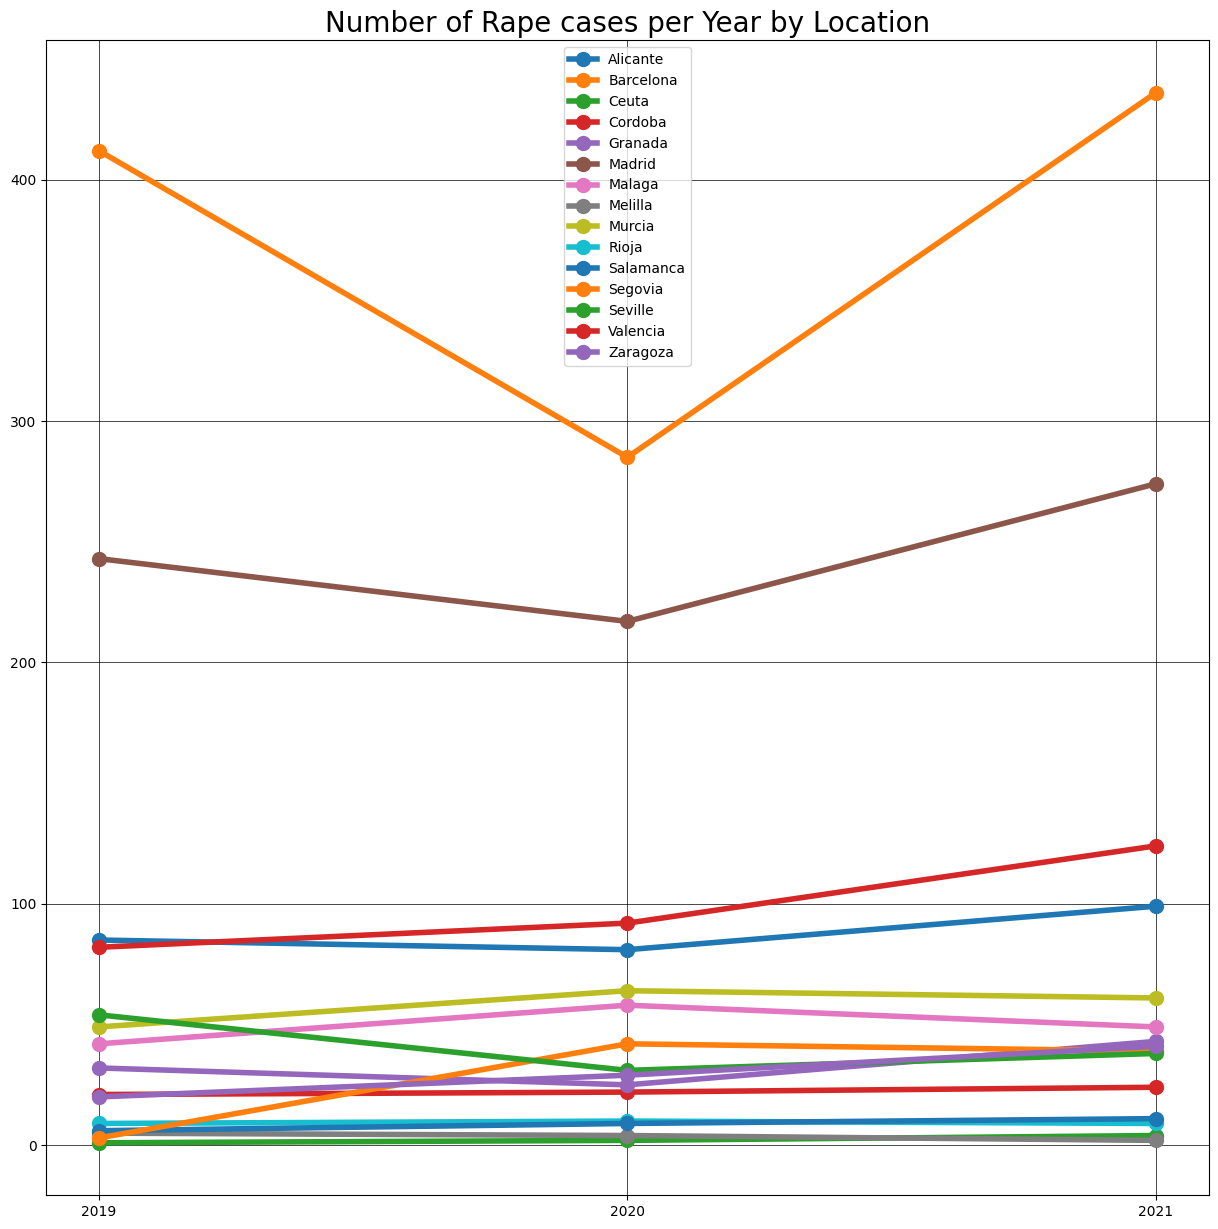

In [108]:
plt.figure(figsize =(15,15))
plt.title("Number of Rape cases per Year by Location",fontsize=20)
for i in SAWP2.columns:
    if i != 'Year':
        plt.plot(SAWP2['Year'],SAWP2[i],label=i,marker='.',linewidth=4,markersize=20)
plt.xticks(SAWP2['Year'])
plt.grid(True,color='black',linestyle='-',linewidth=0.5)
plt.legend(fontsize=10)
plt.show()

CONCLUSION

It concludes that based on the gathered, cleaned, analyzed and visualized data, Madrid has the highest crime cases and Barcelona has the highest rape cases in Spain from 2019 to 2021.

Data is from: https://www.kaggle.com/datasets/marshuu/crime-rate-in-spain-2019-2021